# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Marsha Kamila
- **Email:** cacha.kamila04@gmail.com
- **ID Dicoding:** marsha_kamila

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah penyewaan sepeda dalam rentang tahun 2011 hingga 2012?
- Apakah faktor musim dan cuaca lebih memberikan pengaruh terhadap jumlah penyewaan sepeda pada hari kerja daripada hari libur?
- Apakah pengguna yang terdaftar cenderung lebih sering menyewa daripada pengguna yang tidak terdaftar setiap bulan?
- Pada rentang waktu jam berapa penyewaan sepeda melonjak tiap harinya pada tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [105]:
bikes_hourly = pd.read_csv("hour.csv")
bikes_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 17 kolom pada dataframe bikes_hourly
- Keterangan dataset berdasarkan sumber diperolehnya dataset:
  - instant: record index
  - dteday : date
  - season : season (1: spring, 2: summer, 3: fall, 4: winter)
  - yr : year (0: 2011, 1: 2012)
  - mnth : month ( 1 to 12)
  - hr : hour (0 to 23)
  - holiday : weather day is holiday or not
  - weekday : day of the week
  - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
  - weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
  - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
  - hum: Normalized humidity. The values are divided to 100 (max)
  - windspeed: Normalized wind speed. The values are divided to 67 (max)
  - casual: count of casual users
  - registered: count of registered users
  - cnt: count of total rental bikes including both casual and registered

### Assessing Data

**Memeriksa Tipe Data**

In [106]:
bikes_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Memeriksa Unique Value**

In [107]:
bikes_hourly.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Memeriksa Duplikasi Pada Data**

In [108]:
print("Jumlah duplikasi pada tabel bikes_hourly: ", bikes_hourly.duplicated().sum())

Jumlah duplikasi pada tabel bikes_hourly:  0


**Mendeskripsikan Value pada Tabel**

In [109]:
bikes_hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada dataframe atau tabel bikes_hourly **tidak** ditemukan adanya *missing value* dan *data duplikat*.
- Value beserta tipe data pada kolom *season, mnth, weekday* akan lebih mudah dipahami jika diubah menjadi standar nama musim, bulan, dan hari serta menjadi tipe data string.
- Value pada kolom *temp, atemp, hum,* dan *windspeed* lebih baik diubah ke dalam bentuk asli (sebelum ternormalisasi) supaya lebih mudah untuk dipahami audiens.
- Tipe data kolom dteday sebaiknya diganti dengan tipe data datetime agar sesuai dengan jenisnya.
- Value pada kolom yr sebaiknya diganti dengan tahun yang direpresentasikan dalam dataset.

### Cleaning Data

**1. Memperbaiki tipe data**

In [110]:
# Memperbaiki dteday, season, mnth, weekday

bikes_hourly['dteday'] = pd.to_datetime(bikes_hourly['dteday'])
bikes_hourly["season"] = bikes_hourly["season"].astype("string")
bikes_hourly["mnth"] = bikes_hourly["mnth"].astype("string")
bikes_hourly["weekday"] = bikes_hourly["weekday"].astype("string")

In [111]:
bikes_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  string        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  string        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  string        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**2. Inaccurate Value**

Agar lebih mudah memahami kolom yang berisi data tentang nama musim, tahun, nama bulan, dan nama hari serta suhu dalam derajat celsius, kolom *temp, atemp, hum,* dan *windspeed* dikembalikan datanya ke dalam bentuk asli sebelum dinormalisasi agar sesuai dengan standar nilai yang sebenarnya.

In [112]:
# Mengubah value pada season
bikes_hourly["season"] = bikes_hourly["season"].replace({"1": "spring", "2": "summer", "3": "fall", "4": "winter"})

# Mengubah value pada yr
bikes_hourly["yr"] = bikes_hourly["yr"].replace({0: 2011, 1: 2012})

# Mengubah value pada mnth
bikes_hourly["mnth"] = bikes_hourly["mnth"].replace({
    "1": "January", "2": "February", "3": "March", "4": "April", "5": "May", "6": "June",
    "7": "July", "8": "August", "9": "September", "10": "October", "11": "November", "12": "December"})

# Mengubah value pada weekday
bikes_hourly["weekday"] = bikes_hourly["weekday"].replace({
    "0": "Sunday", "1": "Monday", "2": "Tuesday", "3": "Wednesday", "4": "Thursday", "5": "Friday", "6": "Saturday"})

bikes_hourly.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [113]:
# Mengembalikan nilai asli pada temp, atemp, hum, dan windspeed
bikes_hourly["temp"] = bikes_hourly["temp"] * 41
bikes_hourly["atemp"] = bikes_hourly["atemp"] * 50
bikes_hourly["hum"] = bikes_hourly["hum"] * 100
bikes_hourly["windspeed"] = bikes_hourly["windspeed"] * 67

bikes_hourly.describe()

,instant,dteday,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,11.546752,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,6.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,12.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,18.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [114]:
bikes_hourly.head(4)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13


**Insight:**
- Terdapat informasi baru bahwa kolom - kolom yang sudah tersebut di atas lebih mudah untuk ddipahami dan dilakukan analisis.

In [115]:
bikes_hourly.to_csv("hour_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore bikes_hourly

In [116]:
bikes_hourly.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,May,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [117]:
user_yr = bikes_hourly.groupby("yr").agg({"cnt": "sum"})
user_yr

,cnt
yr,
2011,1243103
2012,2049576


In [118]:
bikes_hourly.groupby(by="season").agg({
    "cnt": "sum",
    "weathersit": ["mean", "max"],
    "weekday": "max",
    "holiday": ["mean", "max", "min"]
})

cnt weathersit        weekday   holiday        
            sum       mean max        max      mean max min
season                                                     
fall    1061129   1.330294   3  Wednesday  0.021352   1   0
spring   471348   1.460160   4  Wednesday  0.038661   1   0
summer   918589   1.443638   3  Wednesday  0.021774   1   0
winter   841613   1.472117   3  Wednesday  0.034026   1   0

In [119]:
user_regis_cas = bikes_hourly.groupby("mnth").agg({"registered": "sum", "casual": "sum"})
user_regis_cas

,registered,casual
mnth,,
April,208292,60802
August,279155,72039
December,189343,21693
February,136389,14963
January,122891,12042
July,266791,78157
June,272436,73906
March,184476,44444
May,256401,75285


array([[<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'casual'}>]], dtype=object)

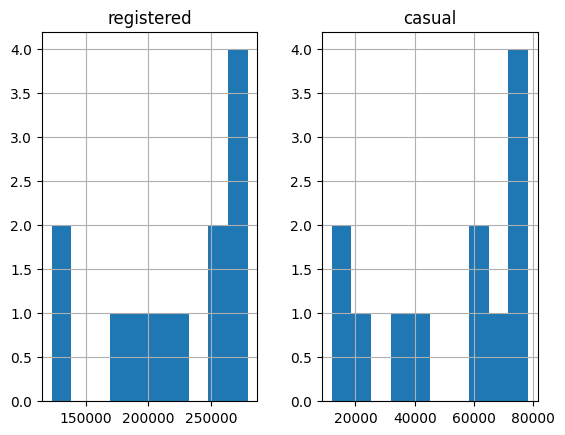

In [120]:
user_regis_cas.hist()

In [121]:
bikes_hourly_2012 = bikes_hourly[bikes_hourly["yr"] == 2012]
bikes_hourly_cnt = bikes_hourly_2012.groupby("hr").agg({"cnt": "mean"})
bikes_hourly_cnt

,cnt
hr,
0,64.630137
1,40.126374
2,26.696970
3,13.332394
4,7.252778
5,25.010989
6,94.315934
7,267.145604
8,454.763736


**Insight:**
- Rentang sewa sepeda bervariasi dengan berbagai kondisi.
- Tren antar tahun penting untuk mengetahui apakah ada peningkatan dalam jumlah penyewa sepeda.
- Musim gugur dan musim panas kemungkinan besar memiliki jumlah penyewa tertinggi karena keadaan cuaca yang baik.
- Pengguna terdaftar mungkin lebih sering dan konsisten dalam menyewa, pengguna tidak terdaftar (casual) bisa meningkat pada bulan tertentu.
- Pelonjakan jumlah penyewa mungkin terjadi pada pagi hari dan sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan jumlah penyewaan sepeda dalam rentang tahun 2011 hingga 2012?

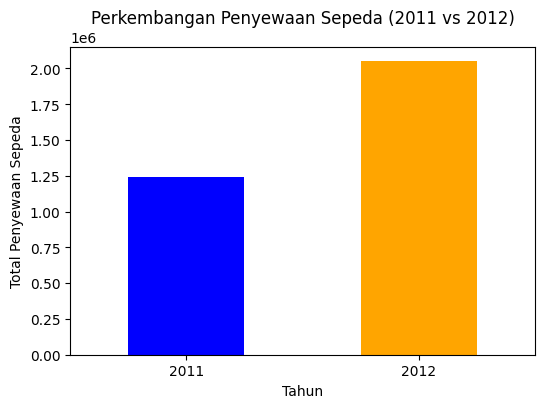

In [122]:
user_yr = bikes_hourly.groupby("yr")["cnt"].sum()

plt.figure(figsize=(6,4))
user_yr.plot(kind="bar", color=["blue", "orange"])
plt.xticks(ticks=[0, 1], labels=["2011", "2012"], rotation=0)
plt.xlabel("Tahun")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Perkembangan Penyewaan Sepeda (2011 vs 2012)")
plt.show()

**Insight:**


*   Penyewaan sepeda mengalami kenaikan dari 2011 ke 2012 sebanyak 806.473 penyewa (2049576 - 1243103).
*   Hal ini menunjukkan bahwa popularitas sistem penyewaan sepeda mengalami peningkatan, yang mungkin disebabkan oleh berbagai faktor, misalnya faktor promosi dari pemerintah.



### Pertanyaan 2: Apakah faktor musim dan cuaca lebih memberikan pengaruh terhadap jumlah penyewaan sepeda pada hari kerja daripada hari libur?

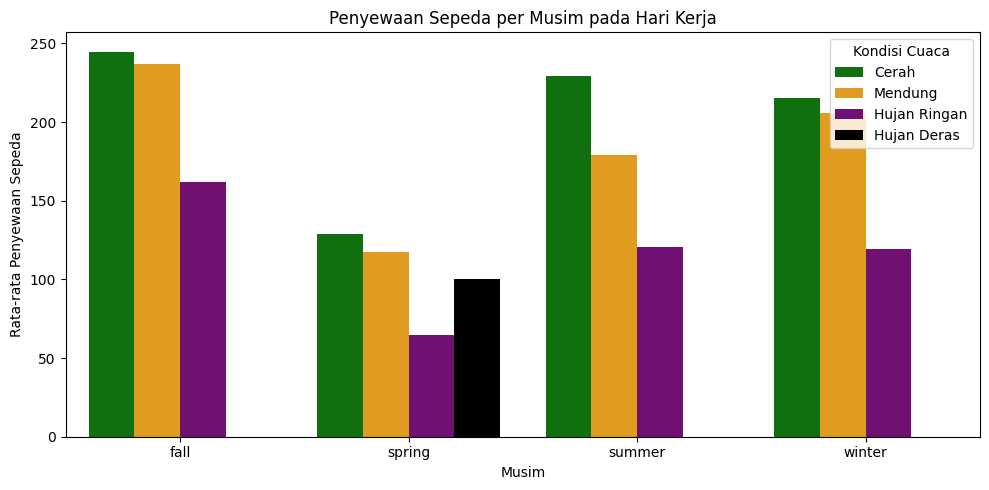

In [123]:
# Filter data untuk hari kerja
workday_data = bikes_hourly[bikes_hourly["workingday"] == 1]

# Agregasi rata-rata penyewaan berdasarkan musim dan kondisi cuaca
workday_season_weather = workday_data.groupby(["season", "weathersit"])["cnt"].mean().reset_index()

weather_palette = {1: "green", 2: "orange", 3: "purple", 4: "black"}

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=workday_season_weather,
    x="season",
    y="cnt",
    hue="weathersit",
    palette=weather_palette
)

plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Penyewaan Sepeda per Musim pada Hari Kerja")

handles, labels = ax.get_legend_handles_labels()
custom_labels = ["Cerah", "Mendung", "Hujan Ringan", "Hujan Deras"]

plt.legend(handles=handles, labels=custom_labels, title="Kondisi Cuaca")

plt.tight_layout()

plt.show()

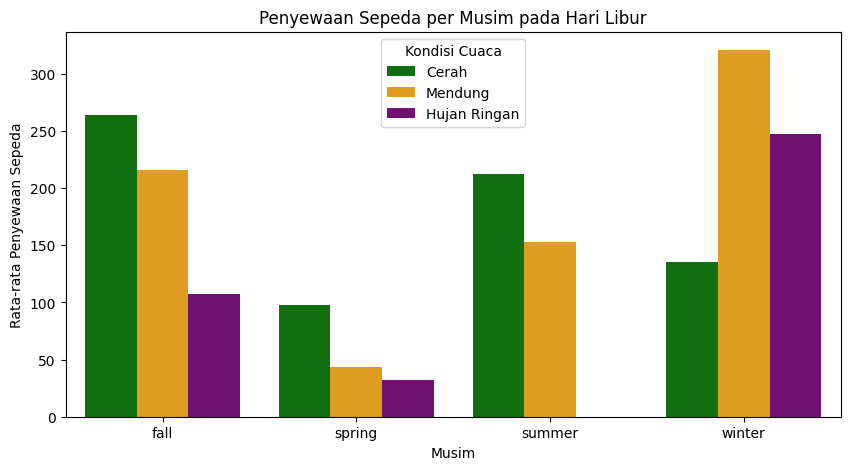

In [124]:
# Filter data untuk hari libur
holiday_data = bikes_hourly[bikes_hourly["holiday"] == 1]

# Agregasi rata-rata penyewaan berdasarkan musim dan kondisi cuaca
holiday_season_weather = holiday_data.groupby(["season", "weathersit"])["cnt"].mean().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=holiday_season_weather,
    x="season",
    y="cnt",
    hue="weathersit",
    palette=weather_palette
)

plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Penyewaan Sepeda per Musim pada Hari Libur")
handles, labels = ax.get_legend_handles_labels()

# Dictionary untuk mapping angka ke label kondisi cuaca
weather_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan Ringan", 4: "Hujan Deras"}

custom_labels = [weather_labels[int(lbl)] for lbl in labels]

plt.legend(handles=handles, labels=custom_labels, title="Kondisi Cuaca")

plt.show()

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada musim gugur dan musim panas baik pada hari kerja maupun hari libur.
- Saat keadaan cuaca sedang baik, hari kerja memiliki lebih banyak penyewaan dibanding hari libur.
- Banyaknya penyewa pada musim dingin bisa terjadi pada hari libur jika kondisi cuaca tidak sedang hujan atau badai.

### Pertanyaan 3: Apakah pengguna yang terdaftar cenderung lebih sering menyewa daripada pengguna yang tidak terdaftar setiap bulan?

<ipython-input-125-da13425f3072>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_type_monthly = bikes_hourly.groupby("mnth")[["registered", "casual"]].sum().sort_index()


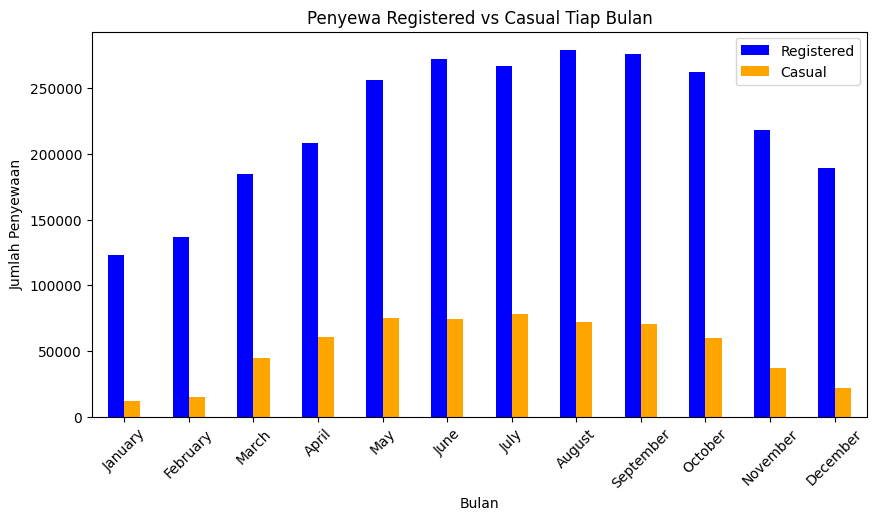

In [125]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Konversi angka bulan ke nama bulan dengan tipe kategori
bikes_hourly["mnth"] = pd.Categorical(
    bikes_hourly["mnth"].replace(dict(enumerate(month_order, start=1))),
    categories=month_order,
    ordered=True
)

# Agregasi jumlah penyewaan registered dan casual tiap bulan
user_type_monthly = bikes_hourly.groupby("mnth")[["registered", "casual"]].sum().sort_index()

user_type_monthly.plot(kind="bar", figsize=(10, 5), color=["blue", "orange"])
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Penyewa Registered vs Casual Tiap Bulan")
plt.legend(["Registered", "Casual"])
plt.xticks(rotation=45)
plt.show()

**Insight:**

*   Pengguna yang terdaftar lebih sering menyewa sepeda dibandingkan dengan pengguna yang tidak terdaftar pada tiap bulan.
*   Penyewaan sepeda oleh pengguna terdaftar mengalami peningkatan pada bulan Mei - Agustus, kemungkinan karena cuaca yang baik.



### Pertanyaan 4: Pada rentang waktu jam berapa penyewaan sepeda melonjak tiap harinya pada tahun 2012?

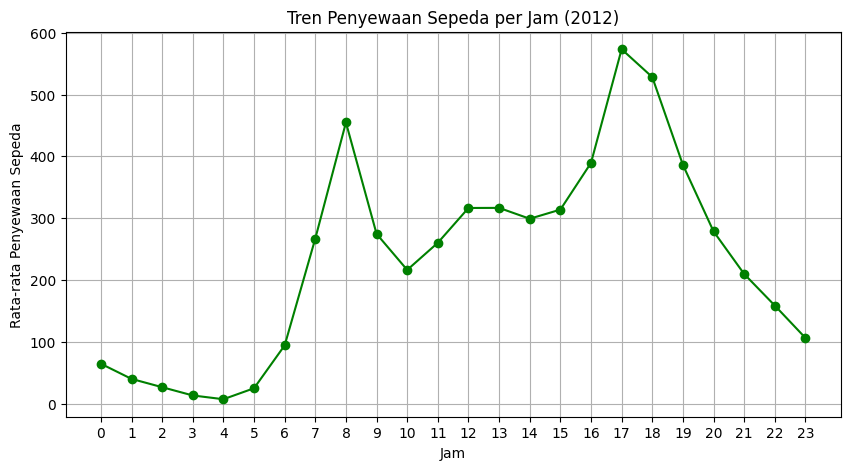

In [126]:
# Filter data hanya untuk tahun 2012
bikes_2012 = bikes_hourly[bikes_hourly["yr"] == 2012]

# Agregasi jumlah penyewaan berdasarkan jam
hourly_trend = bikes_2012.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10,5))
hourly_trend.plot(kind="line", marker="o", linestyle="-", color="green")
plt.xticks(range(24))
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Jam (2012)")
plt.grid()
plt.show()

**Insight:**

Terjadi lonjakan dua kali dalam sehari pada tahun 2012 pada:
*   Jam 07:00 - 09:00 = Kemungkinan karena pengguna berangkat ke kantor/sekolah.
*   Jam 17:00 - 19:00 = Kemungkinan karena jam tersebut merupakan jam pulang pengguna.



## Conclusion

**Bagaimana perkembangan jumlah penyewaan sepeda dalam rentang tahun 2011 hingga 2012?**

- Terjadi peningkatan secara signifikan terhapan penyewaan sepeda dari 2011 ke 2012. Bisa menjadi petunjuk adanya peningkatan popularitas sistem penyewaan sepeda.

**Apakah faktor musim dan cuaca lebih memberikan pengaruh terhadap jumlah penyewaan sepeda pada hari kerja daripada hari libur?**
- Musim dan cuaca memberikan pengaruh lebih signifikan terhadap jumlah penyewaan sepeda pada hari kerja daripada hari libur, terutama ketika keadaan cuaca baik.

**Apakah pengguna yang terdaftar cenderung lebih sering menyewa daripada pengguna yang tidak terdaftar setiap bulan?**
- Pengguna Terdaftar cenderung lebih sering menyewa sepeda daripada pengguna yang tidak terdaftar pada tiap bulan, terutama bulan Mei - Agustus.

**Pada rentang waktu jam berapa penyewaan sepeda melonjak tiap harinya pada tahun 2012?**
- Penyewaan sepeda melonjak pada jam sibuk berangkat kerja di pagi hari (07:00 - 09:00) dan sore hari pada jam pulang kantor (17:00 - 19:00).